TensorFlow/Keras

TensorFlow/Keras Basic

TensorFlow/Keras import

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
print(tf.__version__)
print(keras.__version__)

2.13.0


AttributeError: module 'tensorflow.keras' has no attribute '__version__'

TensorFlow/ Keras 맛보기

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# MNIST dataset download
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [11]:
# Model 생성, compile
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Training / Evaluation
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2953 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.1414 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.1052 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.0860 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.0750 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0658 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.0573 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.0530 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.0497 - accuracy: 0.9833
Epoch 10/10
313/313 [==============================] - 0s 604us/

[0.07027813047170639, 0.9801999926567078]

데이터를 탐색해봅시다:

In [13]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

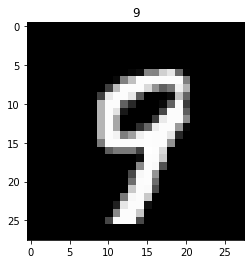

In [14]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

In [16]:
import os
from PIL import Image

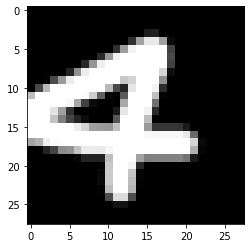

In [31]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [32]:
# shape을 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image, (1, 28, 28))
print(model.predict(image))

print('model이 예측한 값은 {} 입니다.', format(np.argmax(model.predict(image), -1)))

1/1 [==============================] - 0s 13ms/step
[[6.4505490e-05 5.0046820e-06 2.4069266e-01 3.8702613e-01 8.9290069e-07
  7.5518829e-03 6.7157498e-06 3.5516301e-01 9.4755283e-03 1.3705200e-05]]
1/1 [==============================] - 0s 13ms/step
model이 예측한 값은 {} 입니다. [3]


Tensor

In [33]:
# Hello World
hello = tf.constant([3, 3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [36]:
# 상수형 tensor는 아래와 같이 만들 수 있습니다.
# 출력해보면 tensor의 값과 함께, shape과 내부의 data type을 함께 볼 수 있습니다.
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [37]:
# 아래와 같이 numpy ndarray나 python의 list도 tensor로 바꿀 수 있습니다.
x_np = np.array([[1.0, 2.0],
                 [3.0, 4.0]])
x_list = [[1.0, 2.0],
          [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [38]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [39]:
# 반대로 tensor를 다음과 같이 numpy ndarry로 바꿀 수도 있습니다.
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [40]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [42]:
a =tf.ones((2, 3))
b =tf.zeros((2, 3))
c =tf.fill((2, 2), 2)
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [43]:
d = tf.zeros_like(c)
e = tf.zeros_like(c)
print(d)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)


In [44]:
# create indentity matrix
f =tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [45]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


Tensor의 속성

In [47]:
tensor = tf.random.normal((3, 4))

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')

Shape of tensor: (3, 4)
Datatype of tensor: <dtype: 'float32'>


In [48]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of Tensor: {tensor.dtype}')

Shape of tensor: (4, 3)
Datatype of Tensor: <dtype: 'int32'>


Variable

In [49]:
# tensor의 값 변경 - 변경 불가능 ex) 파이썬 튜플
tensor = tf.ones((3, 4))
print(tensor)

tensor[0, 0] = 2.

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [50]:
# variable 만들기, 값 변경
# Tensor 값을 변경하려면 variable을 사용
variable = tf.Variable(tensor)
print(variable)

variable[0, 0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [51]:
# 초기값을 사용해서 Variable을 생성할 수 있습니다.
initial_value = tf.random.normal(shape=(2,2))
weight = tf.Variable(initial_value)

print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.68846565, -0.23895061],
       [-0.3266752 , -0.2753869 ]], dtype=float32)>


In [52]:
# 아래와 같이 variable을 초기화해주는 initializer들을 사용할 수 있다.
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.22009172, -0.14241266],
       [ 0.80487317,  1.4656048 ]], dtype=float32)>


In [53]:
# varialbe은 '.assign(value)', 'assign_add(increment)', 또는 'assign_sub(decrement)'
# 와 같은 메소드를 사용해서 Variable의 값을 갱신합니다.

new_value = tf.random.normal(shape=(2, 2))
print(new_value)
weight.assign_add(new_value)
print(weight)

tf.Tensor(
[[-1.0625083  0.6277322]
 [ 1.7228637  0.9908804]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.2826    ,  0.48531955],
       [ 2.527737  ,  2.4564853 ]], dtype=float32)>


In [54]:
added_value = tf.ones(shape=(2, 2))
weight.assign_sub(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.2826    , -0.51468045],
       [ 1.5277369 ,  1.4564853 ]], dtype=float32)>


Indexing과 Slicing

In [55]:
a = tf.range(1, 13)
a= tf.reshape(a, (3, 4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [56]:
# indexing
print(a[1])
print(a[0, -1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [57]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


Transpose

In [58]:
a =tf.range(16)
a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [59]:
b = tf.transpose(a, (2, 0 , 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


Tensor 연산

In [60]:
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [61]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*50)
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.divide(x, y))
print(tf.matmul(x, y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [63]:
z =tf.range(1, 11)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [64]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [65]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [66]:
concat = tf.concat([z, z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [67]:
concat = tf.concat([z, z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [68]:
stack = tf.stack([z, z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [69]:
stack = tf.stack([z, z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [70]:
stack = tf.stack([z, z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


Dataset

FashionMNIST data 불러오기

In [11]:
mnist = keras.datasets.fashion_mnist
class_name =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
# train_images, train_labels의 shape확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [13]:
# test_images, test_labels의 shape확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [14]:
type(train_images)

numpy.ndarray

In [15]:
# training set의 각 class 별 image 수 확인
unique, count = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, count))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [16]:
# test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

Data 시각화하기

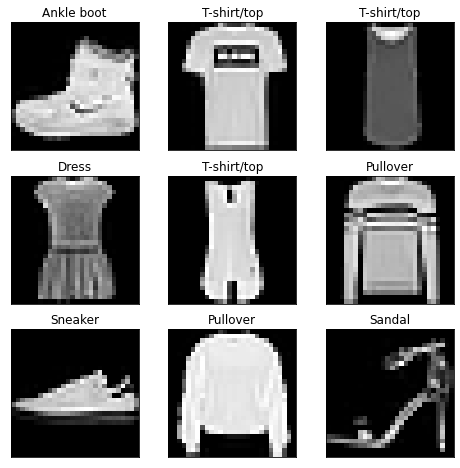

In [17]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_name[train_labels[i]])
plt.show()

Data 전처리

In [18]:
# image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

Dataset 만들기

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
    buffer_size=100000).batch(64)

test_dataset= tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: {imgs.shape}
Labels batch shape: {lbs.shape}


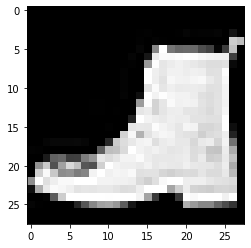

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [20]:
# Dataset을 통해 반복하기(iterate)
# 이미지와 정답(label)을 표기합니다.
imgs, lbs = next(iter(train_dataset))
print("Feature batch shape: {imgs.shape}")
print("Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {lb}')

Custom Dataset 만들기

In [21]:
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
    print(x)

[0 1 2 3 4 5 6 7 8 9]
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [22]:
# data 전처리(변환), shuffle, batch 추가
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [23]:
for _ in range(3):
    for x in ds_tensors:
        print(x)
    print('='*50)

tf.Tensor([16  1], shape=(2,), dtype=int32)
tf.Tensor([81 25], shape=(2,), dtype=int32)
tf.Tensor([49 36], shape=(2,), dtype=int32)
tf.Tensor([64  9], shape=(2,), dtype=int32)
tf.Tensor([4 0], shape=(2,), dtype=int32)
tf.Tensor([49 16], shape=(2,), dtype=int32)
tf.Tensor([1 4], shape=(2,), dtype=int32)
tf.Tensor([ 0 81], shape=(2,), dtype=int32)
tf.Tensor([ 9 36], shape=(2,), dtype=int32)
tf.Tensor([64 25], shape=(2,), dtype=int32)
tf.Tensor([25  9], shape=(2,), dtype=int32)
tf.Tensor([64 36], shape=(2,), dtype=int32)
tf.Tensor([81 49], shape=(2,), dtype=int32)
tf.Tensor([16  1], shape=(2,), dtype=int32)
tf.Tensor([0 4], shape=(2,), dtype=int32)


Model

1. Keras Sequential API 사용

In [24]:
def create_seq_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [25]:
seq_model = create_seq_model()

In [26]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2. Keras Functional API 사용

In [50]:
def create_func_model():
    inputs = keras.Input(shape=(28, 28))
    flatten = keras.layers.Flatten()(inputs)
    dense = keras.layers.Dense(128, activation='relu')(flatten)
    drop = keras.layers.Dropout(0.2)(dense)
    outputs = keras.layers.Dense(10, activation='softmax')(drop)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [51]:
func_model = create_func_model()

In [52]:
func_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Class Subclassing 사용

In [53]:
class SubClassModel(keras.Model):
    def __init__(self):
        super(SubClassModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = keras.layers.Dense(128, activation='relu')
        self.drop = keras.layers.Dropout(0.2)
        self.dense2 = keras.layers.Dense(10, activation='softmax')
    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop(x)
        return self.dense2(x)

In [54]:
subclass_model = SubClassModel()

In [55]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_10 (Dense)            multiple                  100480    
                                                                 
 dropout_5 (Dropout)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# 가상의 data 만들어서 예측하기
inputs = tf.random.normal((1, 28, 28))
outputs = subclass_model(inputs)
pred = tf.argmax(outputs, -1)
print(f'Predicted class: {pred}') 

Predicted class: [3]


Traning/Validation

Keras API 사용

In [57]:
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.8961 - val_loss: 0.3443 - val_accuracy: 0.8773
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2711 - accuracy: 0.8985 - val_loss: 0.3421 - val_accuracy: 0.8757
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9007 - val_loss: 0.3431 - val_accuracy: 0.8769
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2612 - accuracy: 0.9030 - val_loss: 0.3337 - val_accuracy: 0.8818
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2578 - accuracy: 0.9031 - val_loss: 0.3247 - val_accuracy: 0.8863
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.9061 - val_loss: 0.3242 - val_accuracy: 0.8866
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2466 - accuracy: 0.9072 - val_loss: 0.3332 - val_accuracy: 0.8843
Epoch 

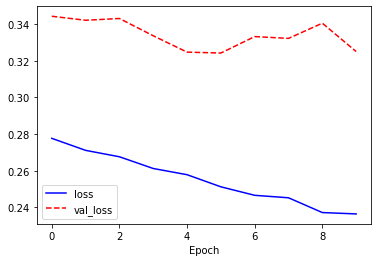

In [59]:
## Plot losses
plt.plot(history.history['loss'], '-b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

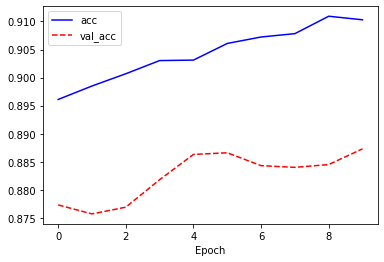

In [60]:
## Plot Accuracy
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

GradientTape 사용

In [61]:
# loss function
loss_object= keras.losses.CategoricalCrossentropy()

In [62]:
# optimizer
learning_rate= 0.001
optimizer= keras.optimizers.Adam(learning_rate=learning_rate)

In [63]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [67]:
@tf.function
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [68]:
@tf.function
def test_step(model, images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [69]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)

  for test_images, test_labels in test_dataset:
    test_step(func_model, test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.5592473149299622, Accuracy: 80.47000122070312, Test Loss: 0.44220831990242004, Test Accuracy: 84.5
Epoch 2, Loss: 0.40819835662841797, Accuracy: 85.17333221435547, Test Loss: 0.4046299159526825, Test Accuracy: 85.5
Epoch 3, Loss: 0.3709067106246948, Accuracy: 86.63999938964844, Test Loss: 0.3769981861114502, Test Accuracy: 86.41999816894531
Epoch 4, Loss: 0.3497238755226135, Accuracy: 87.19000244140625, Test Loss: 0.367878258228302, Test Accuracy: 86.68000030517578
Epoch 5, Loss: 0.334762841463089, Accuracy: 87.79833221435547, Test Loss: 0.37396764755249023, Test Accuracy: 86.5
Epoch 6, Loss: 0.32190513610839844, Accuracy: 88.24666595458984, Test Loss: 0.3707446753978729, Test Accuracy: 86.55999755859375
Epoch 7, Loss: 0.3119216859340668, Accuracy: 88.4433364868164, Test Loss: 0.3614586591720581, Test Accuracy: 86.66999816894531
Epoch 8, Loss: 0.30134204030036926, Accuracy: 88.8066635131836, Test Loss: 0.3417406380176544, Test Accuracy: 87.93000030517578
Epoch 9, Loss:

Model 저장하고 불러오기

parameter만 저장하고 불러오기

In [75]:
seq_model.save_weights('seq_model.ckpt')

In [76]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 683us/step - loss: 2.6166 - accuracy: 0.1063


[2.6166250705718994, 0.1062999963760376]

In [78]:
seq_model_2.load_weights('seq_model.ckpt')

In [79]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 841us/step - loss: 0.3250 - accuracy: 0.8873


[0.3250478506088257, 0.8873000144958496]

Model 전체를 저장하고 불러오기

In [80]:
seq_model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model\assets


INFO:tensorflow:Assets written to: seq_model\assets


In [83]:
seq_model_3 = keras.models.load_model('seq_model')

In [84]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 0s 760us/step - loss: 0.3250 - accuracy: 0.8873


[0.3250478506088257, 0.8873000144958496]

Tensorboard 사용하여 시각화하기

In [ ]:
%load_ext tensorboard

Keras Callback 사용

In [85]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
new_model_1.evaluate(test_dataset)

157/157 [==============================] - 0s 676us/step - loss: 2.5041 - accuracy: 0.0238


[2.5040860176086426, 0.023800000548362732]

In [89]:
log_dir = 'logs/new_model_1'

tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [90]:
new_model_1.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset,
                callbacks=[tensorboard_cb])

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5611 - accuracy: 0.8037 - val_loss: 0.4540 - val_accuracy: 0.8318
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4058 - accuracy: 0.8559 - val_loss: 0.3854 - val_accuracy: 0.8628
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3706 - accuracy: 0.8666 - val_loss: 0.3776 - val_accuracy: 0.8646
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3488 - accuracy: 0.8731 - val_loss: 0.3568 - val_accuracy: 0.8716
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8784 - val_loss: 0.3596 - val_accuracy: 0.8719
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3183 - accuracy: 0.8828 - val_loss: 0.3457 - val_accuracy: 0.8790
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3094 - accuracy: 0.8852 - val_loss: 0.3414 - val_accuracy: 0.8772
Epoch 

In [91]:
%tensorboard --logdir $log_dir

UsageError: Line magic function `%tensorboard` not found.


Summary Writer 사용

In [92]:
new_model_2 = create_seq_model()

In [93]:
# loss function
loss_object= keras.losses.CategoricalCrossentropy()

In [94]:
# optimizer
learning_rate= 0.001
optimizer= keras.optimizers.Adam(learning_rate=learning_rate)

In [95]:
# loss, accuracy 계산
train_loss= keras.metrics.Mean(name='train_loss')
train_accuracy= keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss= keras.metrics.Mean(name='test_loss')
test_accuracy= keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [108]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [98]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels. predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [105]:
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [2]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(new_model_2, images, labels)
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

  for test_images, test_labels in test_dataset:
    test_step(new_model_2, test_images, test_labels)
  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

NameError: name 'train_loss' is not defined

In [ ]:
%tensorboard --logdir 'logs/gradient_tape'